In [23]:

#libraries
import os 
import random 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
from PIL import Image
from skimage import img_as_float 
from IPython.display import display
import pathlib

In [55]:
ROOT_PATH = os.path.dirname(os.path.abspath("__file__"))
DATA_DIR = ROOT_PATH + '/data/'

img_data = {} 

In [56]:
for folder in os.listdir(DATA_DIR): 
    print(folder)
    if folder != '.DS_Store':
        img_path = DATA_DIR + folder + '/'
        img_data[folder] = [img_path + img for img in os.listdir(img_path)]
    

yale_vibes
.DS_Store
icloud_photos


yale_vibes


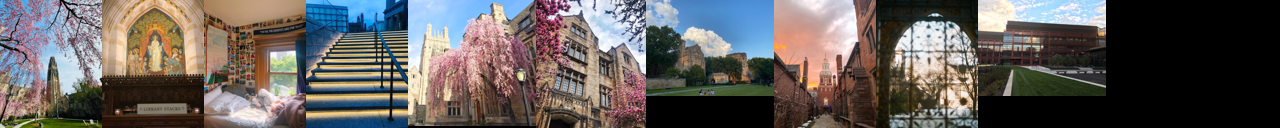

icloud_photos


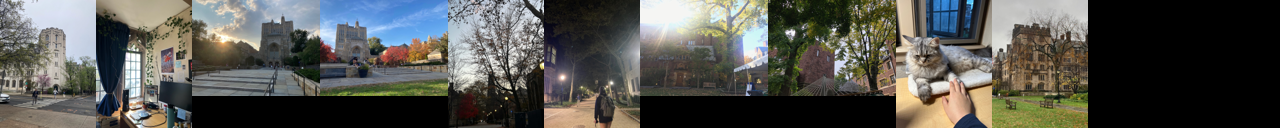

In [57]:
#Sample some images 
for i, folder in enumerate(img_data.keys()): 
    print(folder)
    sample_size = 10 
    ims = [Image.open(x) for x in random.sample(img_data[folder], sample_size)]
    im_size = 128 
    new_im = Image.new('RGB', (im_size*sample_size, im_size))
    x_offset = 0 
    for i in ims: 
        i.thumbnail((im_size, im_size))
        new_im.paste(i, (x_offset, 0))
        x_offset += i.size[0]
   
    display(new_im) 
    

# Removing duplicate images 

In [58]:
def load_image(path, size=(256,256)):
    """
    Convert image to float
    
    Input:
    path(str): Path to image file
    size(tuple): Resize image

    Output:
    (array): 256x256x3 image, all values float between 0 and 1
    """
    img = Image.open(path)
    img = img.convert('RGB')
    img = img.resize(size)
    return img_as_float(img)

In [59]:
def mse(img1, img2):
    err = np.sum((img1 - img2) ** 2)
    err /= float(img1.shape[0] * img1.shape[1])
    return err

In [60]:
img_list = img_data['yale_vibes']
mse_mat = np.full((len(img_list), len(img_list)), np.inf)


In [61]:

for i, img_path1 in enumerate(img_list[:-1]):
    img1 = load_image(img_path1)
    for k, img_path2 in enumerate(img_list[i+1:]):
        img2 = load_image(img_path2)
        mse_mat[i,k+i+1] = mse(img1, img2)

KeyboardInterrupt: 

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = sns.heatmap(mse_mat, mask=np.tril(mse_mat), cmap=sns.cm.rocket_r)
cax.collections[0].colorbar.set_label("MSE")
plt.show()